# Laboratorio 2: Exploración y Visualización de Datos
Fecha: Marzo 2025

Integrantes: **AGREGUEN SUS NOMBRES COMPLETOS** y la sección de cada integrante


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()


# Corregir el nombre mal escrito directamente en el DataFrame original
tipos['Descripcion'] = tipos['Descripcion'].replace(
    'VII Región del Bio-Bio', 'VIII Región del Bio-Bio'
)


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)?

In [42]:
rows, columns = tipos.shape
print(f"Columnas: {columns}")
print(f"Filas: {rows}")

Columnas: 5
Filas: 4296


2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

In [43]:
tipos.iloc[235]

Muestra            Comunal
Descripcion       PALMILLA
Anio                  2011
TipoAccidente    Atropello
Cantidad                 6
Name: 236, dtype: object

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [44]:

array = tipos['Anio'].to_numpy()
x = np.unique(array)
print(f"Son solo: {len(x)} años y son {x}")


Son solo: 2 años y son [2010 2011]


4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones más peligrosas en cuanto a accidentes de tránsito.

    **OJO**: hay que sumar la cantidad de accidentes para los distintos tipos de accidente de una misma región

<Axes: xlabel='Descripcion'>

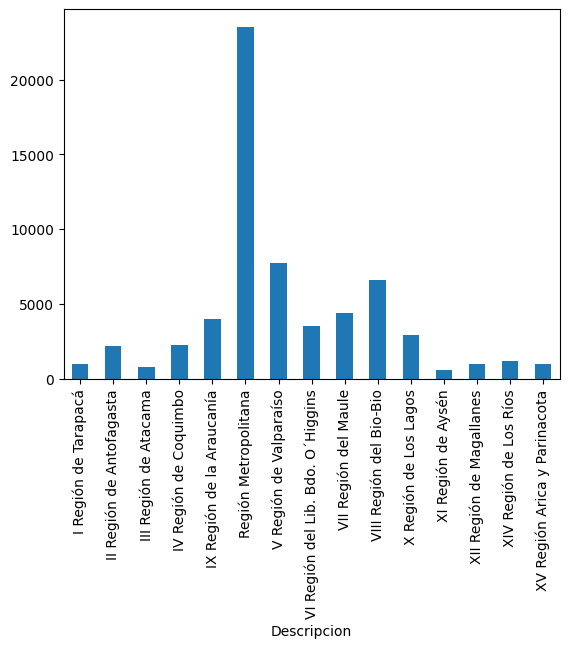

In [45]:

df_filtered_2011 = tipos[tipos['Muestra'] == 'Regional']
df_filtered_2011 = df_filtered_2011[df_filtered_2011['Anio'] == 2011]
df_filtered_2011= df_filtered_2011.groupby('Descripcion')['Cantidad'].sum()


df_filtered_2011.plot.bar( x='Descripcion', y='Cantidad')

R: TODO

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

<Axes: title={'center': 'Cantidad'}, xlabel='TipoAccidente'>

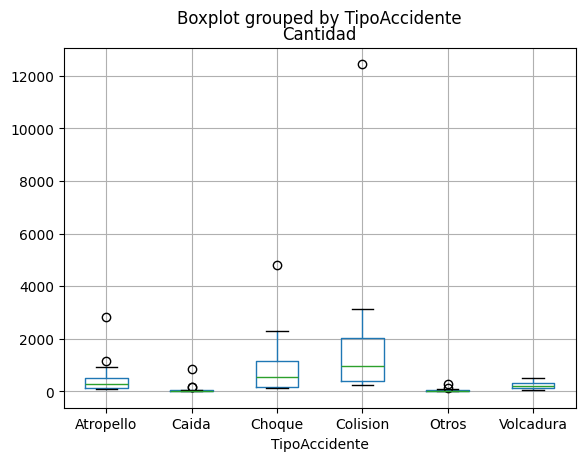

In [46]:
df_filtered_2010 = tipos[tipos['Muestra'] == 'Regional']
df_filtered_2010 = df_filtered_2010[df_filtered_2010['Anio'] == 2010]

df_filtered_2010.boxplot(column='Cantidad', by='TipoAccidente')

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

R: Una forma adicional de explorar los datos podria ser ver los tipos de accidentes separados por region para asi lograr ver que tipo de accidentes son más comunes en cada una

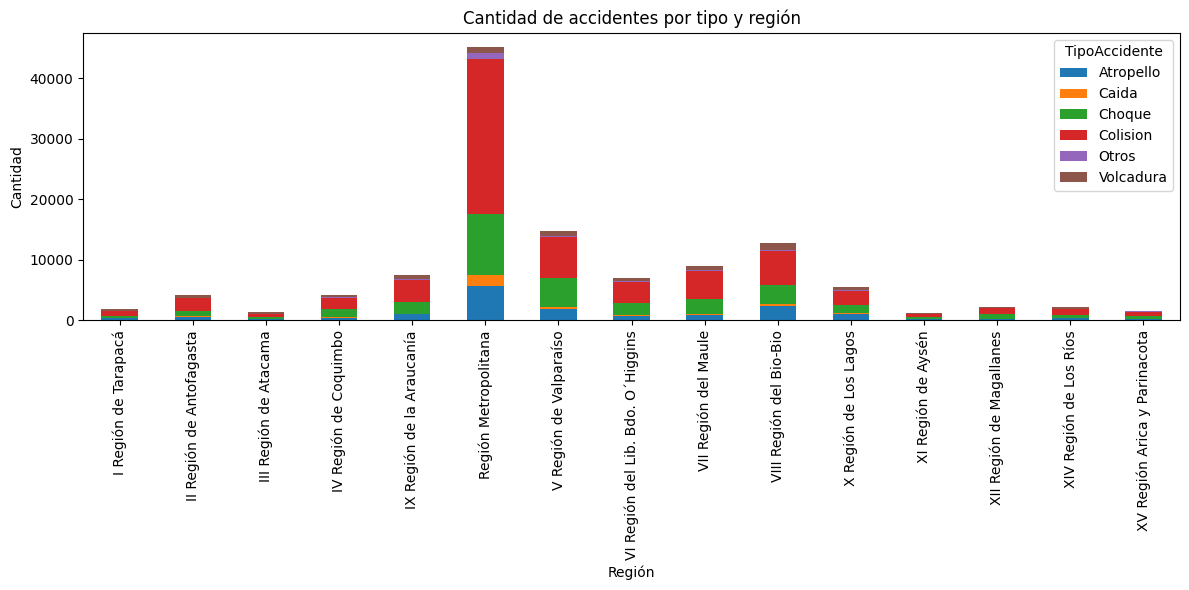

In [47]:

tipos_regional = tipos[tipos["Muestra"] == "Regional"]
grouped = tipos_regional.groupby(['Descripcion', 'TipoAccidente'])['Cantidad'].sum().reset_index()
pivot = grouped.pivot(index='Descripcion', columns='TipoAccidente', values='Cantidad').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Cantidad de accidentes por tipo y región')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Otra informacion interesante a analizar puede ser ver si existen diferencias entre la cantidad de accidentes por año mediante un grafico de barras

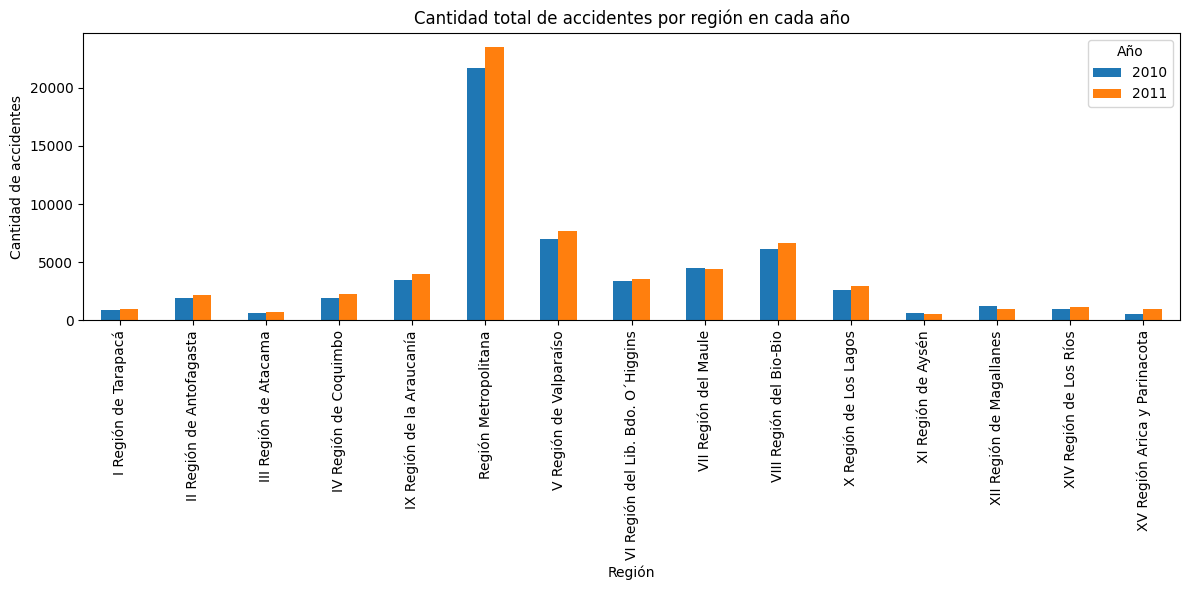

In [48]:
tipos_regional = tipos[tipos["Muestra"] == "Regional"]

grouped = tipos_regional.groupby(['Descripcion', 'Anio'])['Cantidad'].sum().reset_index()

pivot = grouped.pivot(index='Descripcion', columns='Anio', values='Cantidad').fillna(0)

pivot.plot(kind='bar', figsize=(12,6))
plt.title('Cantidad total de accidentes por región en cada año')
plt.xlabel('Región')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [49]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



In [50]:
print("Binario")
print(diabetes['hypertension'].value_counts(), '\n')
print(diabetes['heart_disease'].value_counts(), '\n')
print(diabetes['diabetes'].value_counts())


Binario
hypertension
0    92515
1     7485
Name: count, dtype: int64 

heart_disease
0    96058
1     3942
Name: count, dtype: int64 

diabetes
0    91500
1     8500
Name: count, dtype: int64


In [51]:
print("Multiclase")
print(diabetes['gender'].value_counts(), '\n')
print(diabetes['smoking_history'].value_counts(), '\n')

Multiclase
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64 

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64 



8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

In [52]:
print("Promedios \n")


print(diabetes[['age', 'bmi', 'HbA1c_level','blood_glucose_level']].mean(numeric_only=True))
print('\n')
print("Medianas \n")
print(diabetes[['age', 'bmi', 'HbA1c_level','blood_glucose_level']].median(numeric_only=True))
print('\n')
print("Desviación Estándar \n")
print(diabetes[['age', 'bmi', 'HbA1c_level','blood_glucose_level']].std(numeric_only=True))


Promedios 

age                     41.885856
bmi                     27.320767
HbA1c_level              5.527507
blood_glucose_level    138.058060
dtype: float64


Medianas 

age                     43.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
dtype: float64


Desviación Estándar 

age                    22.516840
bmi                     6.636783
HbA1c_level             1.070672
blood_glucose_level    40.708136
dtype: float64


# Clasificación

Ahora crearemos un clasificador binario (por ahora no importa cómo funciona), y veremos que tal es su desempeño decidiendo si una persona tiene diabetes o no.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Droppear categoricas
df_clf = diabetes.drop(columns=['gender', 'smoking_history'])
# Separar atributos y target
X = df_clf.drop(columns=['diabetes'])
y = df_clf['diabetes']
# Separar conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Entrenar modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
# Obtener predicciones
y_pred = clf.predict(X_test)

### Veamos su matríz de confusión

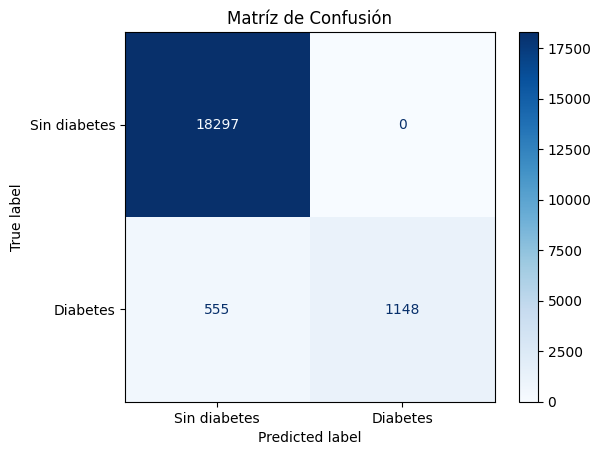

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Matríz de Confusión')
plt.show()

9. ¿Qué se puede decir a partir de la matriz de confusión? ¿El clasificador tiene un problema asociado a precision o recall?

R: 

Viendo la matriz de confusion se puede ver que el modelo es capaz de predecir correctamente la mayoria de casos de diabetes, aunque se puede ver una cantidad no menor de casos falsos negativos, esto si se define como positivo el que el paciente tenga diabetes, luego se puede calcular la precision y recall de la siguiente forma con el fin de analizar el comportamiento del modelo

Precisión: 1148/(1148 + 0) = 1

Recall: 1148/(1148 + 555) = 1148/1703 = 0.674

Lo que se puede extraer de lo anterior es que el modelo tiene una precisión  perfecta, lo que indica que cada vez que el modelo dice que un dato es positivo, entonces este lo sera. El problema del modelo viene del Recall, ya que tiene un problema indicando la totalidad de los resultados positivos, solo encontrando un 0.67 de estos.

### Curva ROC 🤘

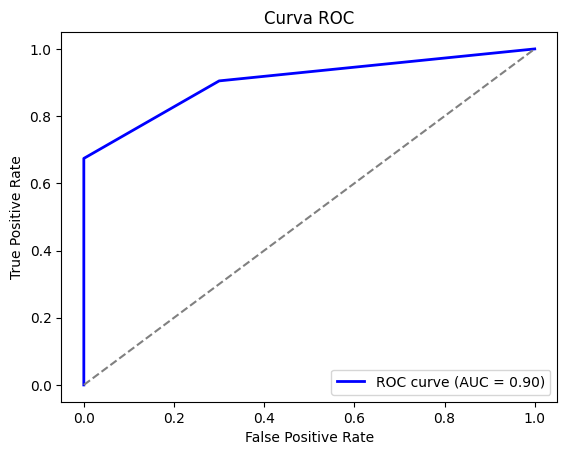

In [55]:
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Identidad
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

10. ¿Podemos decir que el modelo es bueno según su curva ROC? ¿Para que podemos usar esta visualización?

R: El modelo es bueno según la curva ROC, esto debido a que el objetivo de la misma es resumir la matriz de confusión en una visualización, de aquí se puede inferir el umbral óptimo para el modelo, notando que si queremos un 0% de falsos positivos, entonces tenemos una sensibilidad (TPR) de alrededor del 67%. En la visualización tenemos también el valor del AUC, que nos indica que tan efectivo es el modelo clasificando. En este caso se tiene 90% de AUC, por ende, se justifica que el modelo sí tiene capacidad predictiva.

11. ¿Sería seguro usar este clasificador en un caso real diagnosicando pacientes?

R: El clasificador es seguro, considerando que cuenta con un AUC de 0.9, esto representa que el modelo tiene capacidad de clasificación. Sin embargo, considerando que el modelo será utilizado para diagnosticar pacientes reales, es importante tener cuidado con el umbral a utilizar, sobre todo evitar el peor caso que es diagnosticar falsos negativos. Para lograr esto, podemos optar por un umbral más bajo. Esto significa que el modelo será más generoso al clasificar a los pacientes como positivos, pero se vuelve peor para diagnosticar a los falsos positivos, aunque al tratar con pacientes esto es menos grave que arriesgar falsos negativos.

Y eso es todo por hoy :)
